In [152]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [153]:
df=pd.read_csv('housing.csv')

In [154]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [155]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [156]:
df.shape

(20640, 10)

In [157]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [158]:
df['total_bedrooms'].value_counts()

280.0     55
331.0     51
345.0     50
393.0     49
343.0     49
          ..
2205.0     1
1448.0     1
1691.0     1
2537.0     1
2546.0     1
Name: total_bedrooms, Length: 1923, dtype: int64

In [159]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [160]:
df.total_bedrooms.fillna(df.households, inplace=True)


In [161]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [162]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [163]:
df.ocean_proximity=df.ocean_proximity.map({'<1H OCEAN':1,'INLAND':2,'NEAR OCEAN':3,'NEAR BAY':4,'ISLAND':5})

In [164]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,4
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,4
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,4
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,4


In [165]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1.000000,-0.924664,-0.108197,0.044568,0.068348,0.099773,0.055310,-0.015176,-0.045967,-0.439870
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066295,-0.108785,-0.071035,-0.079809,-0.144160,0.390957
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320474,-0.296244,-0.302916,-0.119034,0.105623,0.145163
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.929955,0.857126,0.918484,0.198050,0.134153,-0.016309
total_bedrooms,0.068348,-0.066295,-0.320474,0.929955,1.000000,0.877995,0.979830,-0.007863,0.050688,-0.021150
population,0.099773,-0.108785,-0.296244,0.857126,0.877995,1.000000,0.907222,0.004834,-0.024650,-0.083537
households,0.055310,-0.071035,-0.302916,0.918484,0.979830,0.907222,1.000000,0.013033,0.065843,-0.027144
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007863,0.004834,0.013033,1.000000,0.688075,-0.039673
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.050688,-0.024650,0.065843,0.688075,1.000000,0.021732
ocean_proximity,-0.439870,0.390957,0.145163,-0.016309,-0.021150,-0.083537,-0.027144,-0.039673,0.021732,1.000000


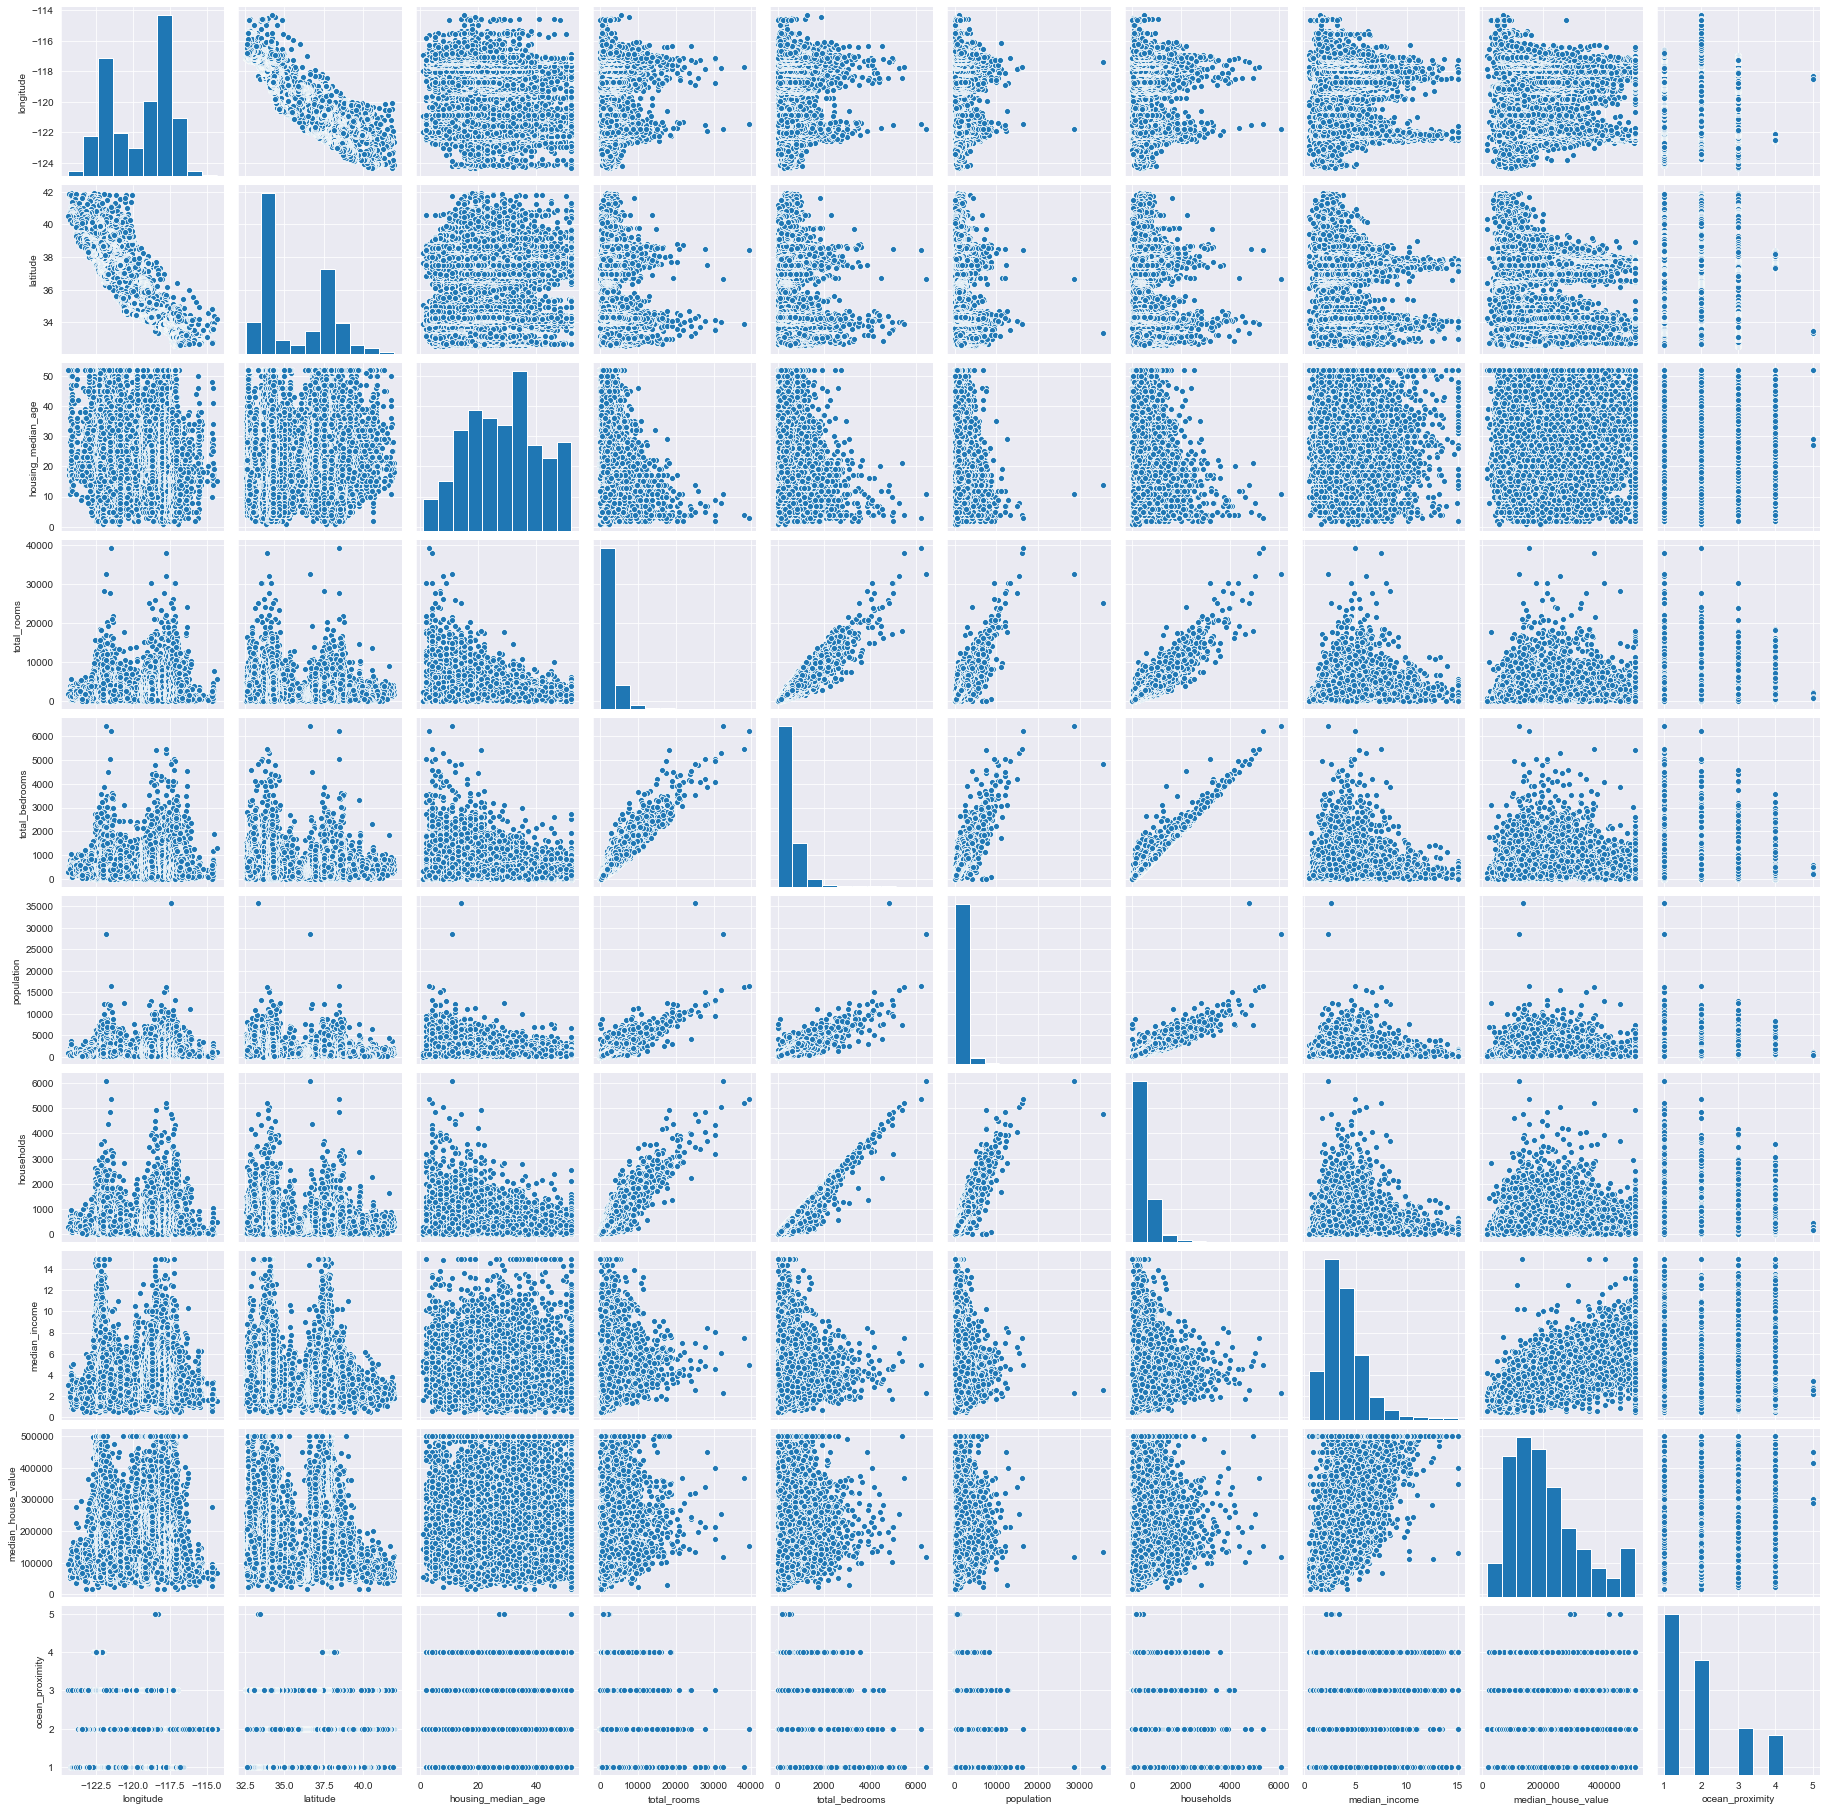

In [166]:
sns.pairplot(df)

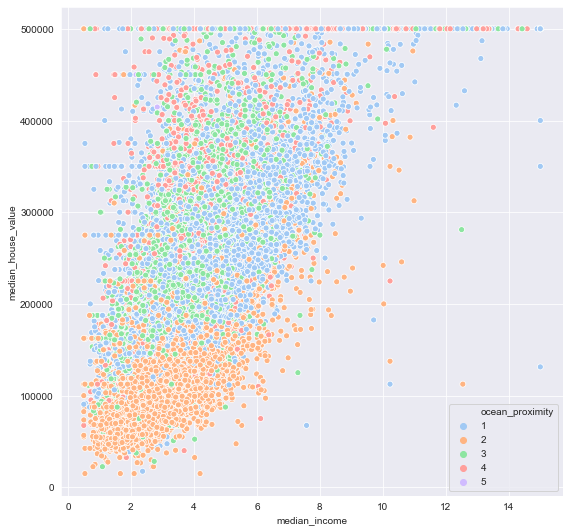

In [167]:
plt.figure(figsize=(9,9))
sns.set_style('darkgrid')
sns.scatterplot(x='median_income',y='median_house_value',palette='pastel',data=df,alpha=1,hue='ocean_proximity')
plt.show()

In [168]:
#Orange- less income and less value
#Blue and Green- more value than orange and more income
#Red- most value and

C:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


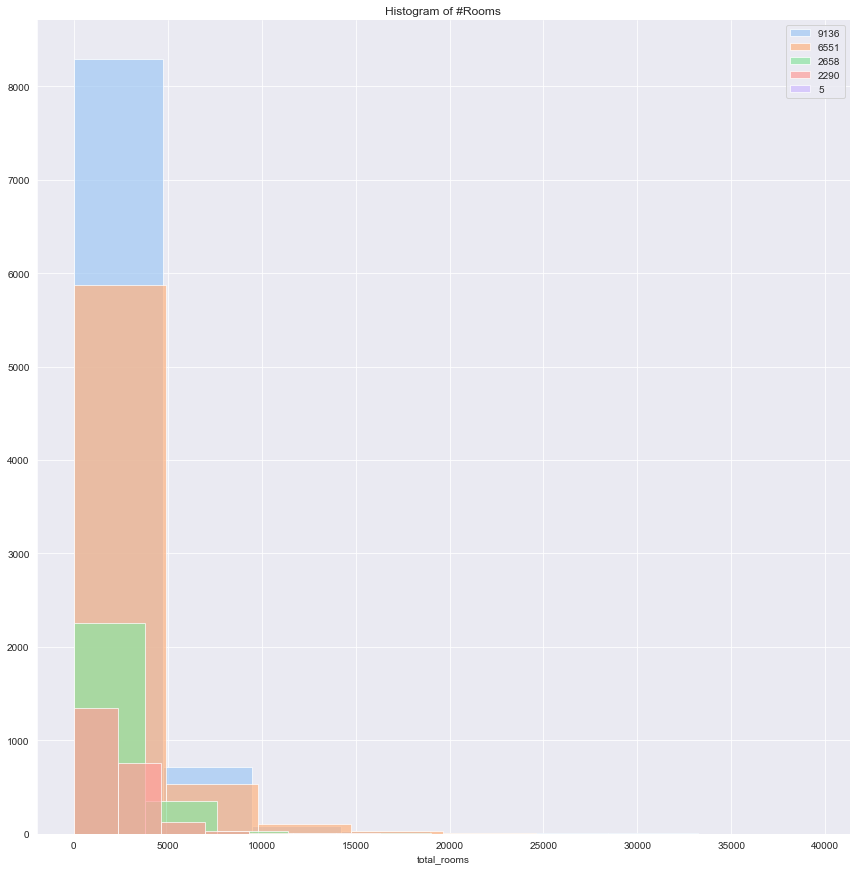

In [169]:
a=sns.FacetGrid(df,hue='ocean_proximity',size=12,palette='pastel')
a=a.map(plt.hist,'total_rooms',bins=8,alpha=0.7)
plt.title('Histogram of #Rooms')
plt.legend(df.ocean_proximity.value_counts())
plt.show()
#a=sns.FacetGrid(df,hue='Private',palette='pastel',size=6,aspect=2)
#a=a.map(plt.hist,'Outstate',bins=20,alpha=0.7)

In [170]:
df['total_rooms'].skew()

4.147343450632158

In [171]:
df['total_rooms']=np.sqrt(df['total_rooms'])

In [172]:
df['total_rooms'].skew()

1.3555003993057428

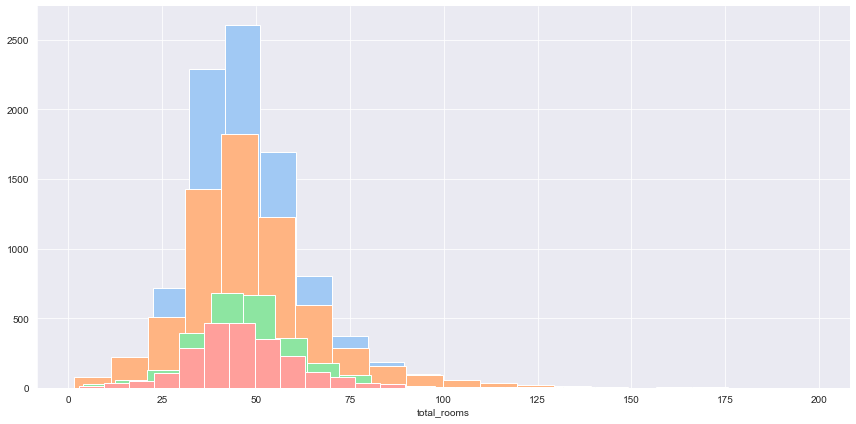

In [173]:
s=sns.FacetGrid(df,hue='ocean_proximity',palette='pastel',size=6,aspect=2)
s=s.map(plt.hist,'total_rooms',bins=20)

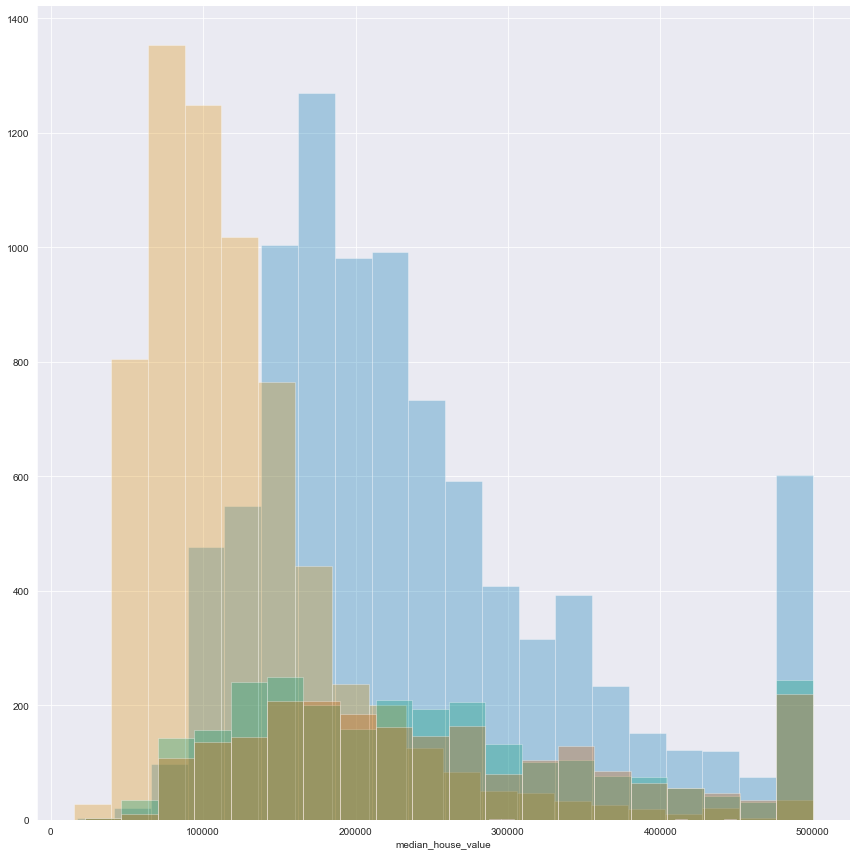

In [174]:
a=sns.FacetGrid(df,hue='ocean_proximity',palette='colorblind',size=12)
a=a.map(plt.hist,'median_house_value',bins=20,alpha=0.3)

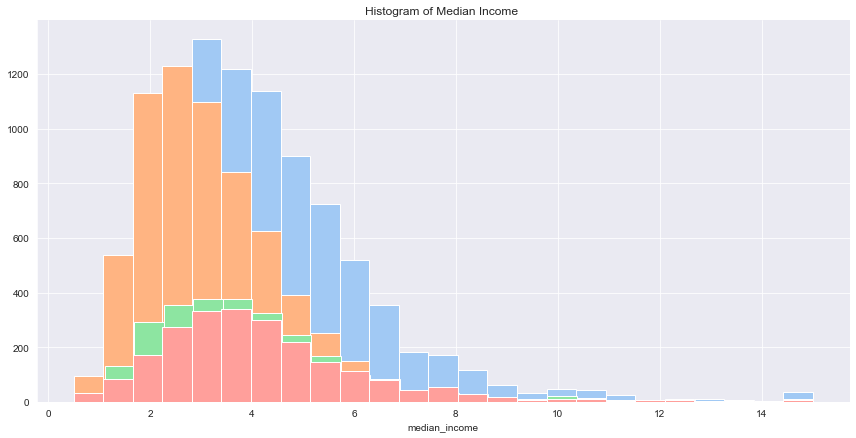

In [175]:
sns.set_style('darkgrid')
p=sns.FacetGrid(df,size=6,palette='pastel',hue='ocean_proximity',aspect=2)
p=p.map(plt.hist,'median_income',bins=25)
plt.title('Histogram of Median Income ')
plt.show()

In [176]:
df['median_income'].skew()

1.6466567021344465

In [177]:
df['median_income']=np.log(df['median_income'])

In [178]:
df['median_income'].skew()

-0.14608181157738845

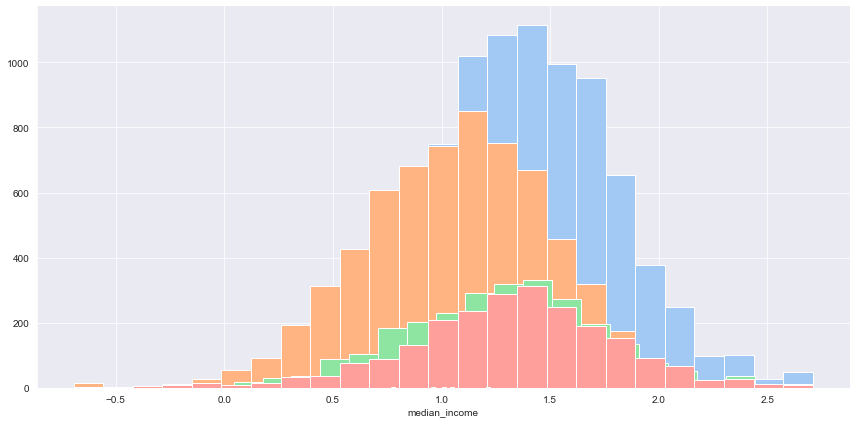

In [179]:
s=sns.FacetGrid(df,size=6,aspect=2,hue='ocean_proximity',palette='pastel')
s=s.map(plt.hist,'median_income',bins=25)

In [180]:
target=df['median_house_value']

In [181]:
df=df.drop('median_house_value',axis=1)

In [182]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df,target,test_size=0.2,random_state=42)

In [183]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
X_train=Scaler.fit_transform(X_train)
X_test=Scaler.fit_transform(X_test)

In [184]:
from sklearn.linear_model import LinearRegression

In [185]:
LR=LinearRegression().fit(X_train,Y_train)

In [186]:
LR_predict=LR.predict(X_test)

In [187]:
new_df=pd.DataFrame({'Predictions':LR_predict,'Actual':Y_test})

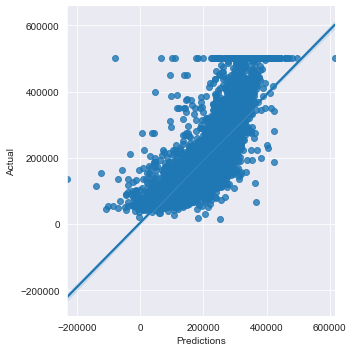

In [188]:
sns.lmplot('Predictions','Actual',data=new_df)

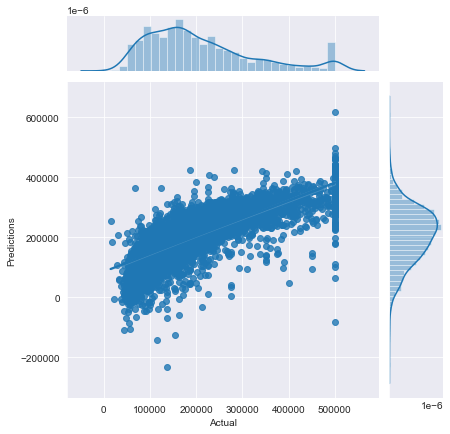

In [189]:
sns.jointplot(x='Actual',y='Predictions',data=new_df,kind='reg',);

In [190]:
from sklearn.metrics import mean_squared_error

In [191]:
print('',np.sqrt(mean_squared_error(Y_test,LR_predict)))

 74791.24242855966


In [192]:
Df=pd.DataFrame({'median_income':df['median_income']})

In [193]:
new_df.shape

(4128, 2)

In [194]:
Df.shape

(20640, 1)

In [195]:
X_train,X_test,Y_train,Y_test=train_test_split(Df,target,test_size=0.2,random_state=42)

In [196]:
lr=LinearRegression().fit(X_train,Y_train)

In [197]:
lr_predict=lr.predict(X_test)

In [198]:
lr_predict

array([ 90672.94364236, 156240.04401784, 207243.37056388, ...,
       363520.65291671, 171543.67945989, 210524.39967296])

In [199]:
np.sqrt(mean_squared_error(Y_test,lr_predict))

87579.8364073278

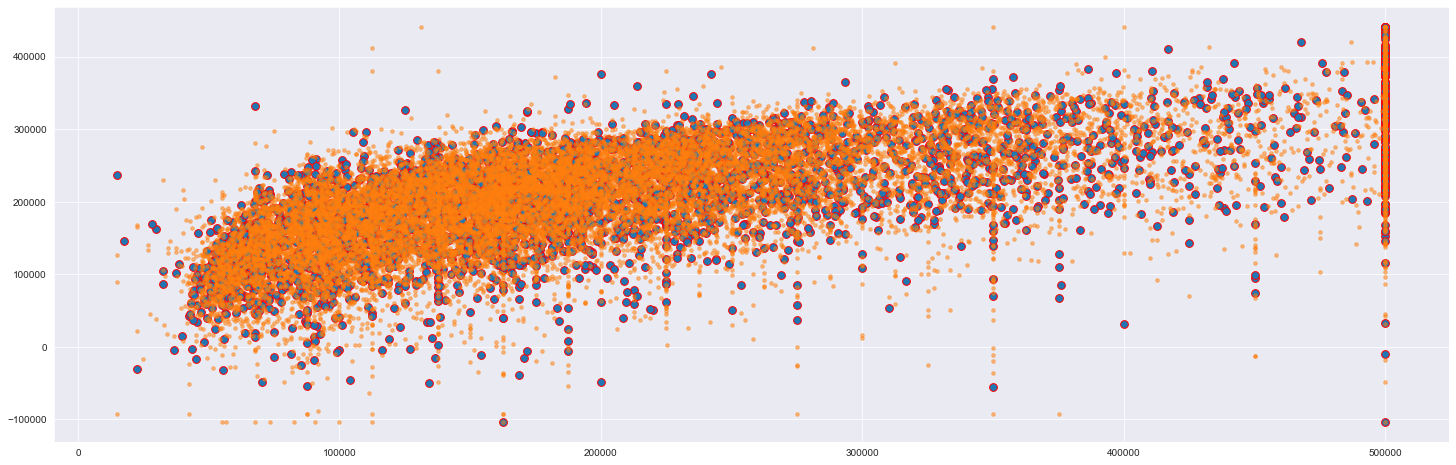

In [200]:
fig = plt.figure(figsize=(25,8))
plt.scatter(Y_test,lr_predict,marker="o",edgecolors ="r",s=60)
plt.scatter(Y_train,lr.predict(X_train),marker=".",s=50,alpha=0.5)


The data is highly skewed and thus Linear Regression does not fit the data very well.

We need to use a different algorithm for price prediciton